In [4]:
from files.scene import *
from files.multiscene import *
from files.IN import *

# Data Creation

## Scene creation

In [36]:
#No interaction scene
escena_no_interaction = Scene(n_body=3, R_init=polygon_init, V_init=polygon_init, r=0.1, v=0.01, dt=1)
escena_no_interaction.simulate(interaction=zero_interaction, t_steps=100)

#Central force scene
escena_central_force = Scene(n_body=3, R_init=random_init, V_init=random_init, r=0.1, v=8e-3, dt=1)
escena_central_force.simulate(interaction=central_force, t_steps=100, alpha=1e-4, beta=0)

#Vicsek model scene
escena_vicsek = Scene(n_body=6,  R_init=random_init, V_init=random_init, r=0.6, v=1e-1, dt=1)
escena_vicsek.simulate(interaction=vicsek, t_steps=100, radius=0.4, angle_vision=np.pi)

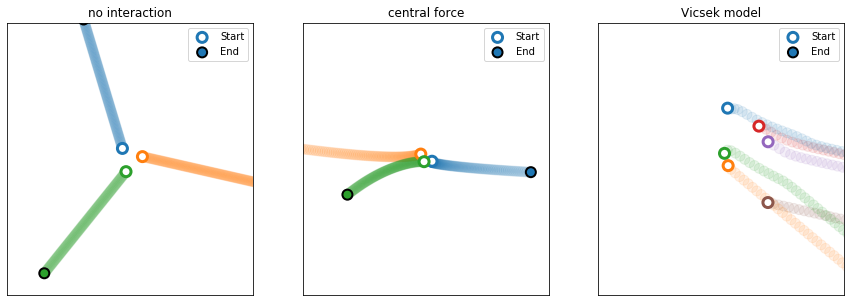

In [38]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

for axi, scene, title in zip(ax,[escena_no_interaction, escena_central_force, escena_vicsek], ['no interaction', 'central force', 'Vicsek model']):
    axi.set_xlim(-1,1)
    axi.set_ylim(-1,1)
    axi.set_title(title)
    axi.tick_params(labelbottom=False, labelleft=False, right=False, top=False, bottom=False, left=False)
    scene.plot_trajectory(who='truth', ax=axi)
    axi.legend()
plt.show()


## Multiscene creation

In [55]:
n_scenes = 3
t_steps = 100
ms = MultiScene()
ms.add_bunch(n_scenes=n_scenes, n_body=5, t_steps=100, R_init=random_init, V_init=random_init, dt=1, r=2e-1, v=5e-2, interaction=zero_interaction)
ms.add_bunch(n_scenes=n_scenes, n_body=5, t_steps=t_steps, R_init=random_init, V_init=random_init, dt=1, r=7.5e-1, v=8e-3, interaction=central_force, alpha=1e-4, beta=0)
ms.add_bunch(n_scenes=n_scenes, n_body=5, t_steps=t_steps, R_init=random_init, V_init=polygon_init, r=6e-1, v=1e-2, interaction=vicsek, radius=2.5e-1)
ms.save('data/demo_multiscene')

ms = MultiScene(load='data/demo_multiscene')

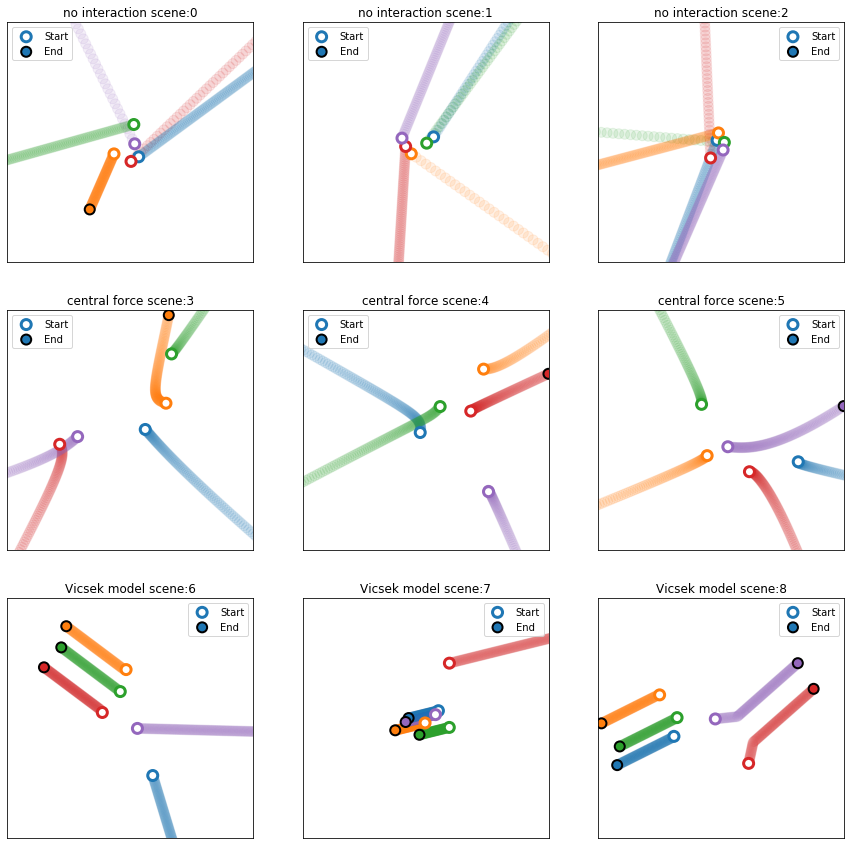

In [56]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
scene_i = 0
for axi,title in zip(ax, ['no interaction', 'central force', 'Vicsek model']):
    for axij in axi:
        axij.set_xlim(-1,1)
        axij.set_ylim(-1,1)
        axij.set_title(title+ f' scene:{scene_i}')
        axij.tick_params(labelbottom=False, labelleft=False, right=False, top=False, bottom=False, left=False)
        ms(scene_i).plot_trajectory(who='truth', ax=axij)
        axij.legend()
        scene_i +=1
plt.show()


## Creating Training and Validation Datasets

In [57]:
n_scenes = 100
t_steps = 100
ms = MultiScene()
ms.add_bunch(n_scenes=n_scenes, n_body=5, t_steps=100, R_init=random_init, V_init=random_init, dt=1, r=4e-1, v=5e-2, interaction=zero_interaction)
ms.save('data/demo_train')

ms = MultiScene()
ms.add_bunch(n_scenes=n_scenes, n_body=5, t_steps=100, R_init=random_init, V_init=random_init, dt=1, r=2e-1, v=5e-2, interaction=zero_interaction)
ms.save('data/demo_val')

### Extracting the features and targets

In [59]:
ms_train = MultiScene(load='data/demo_train')
X_train = ms_train.get_features(joint=True) #features
V_train = ms_train.get_target(var='V', joint=True) #target velocities
A_train = ms_train.get_target(var='A', joint=True) #target accelerations

ms_val = MultiScene(load='data/demo_val')
X_val = ms_val.get_features(joint=True) #features
V_val = ms_val.get_target(var='V', joint=True) #target velocities
A_val = ms_val.get_target(var='A', joint=True) #target accelerations

# CREATING A MODEL

In [ ]:
IN = InteractionNetwork(D_E=2, R_hidden_layers=[8,8], O_hidden_layers=[8], output_var='A', self_edges=False,  aggregator='sum', include_v=True, name='demo_model')
IN.fit(X_train, V_train, validation=(X_val, V_val), learning_rate=1e-1, epochs=5000, print_every=100)
# IN.save('saved_models/'+IN._name)

Epoch( 100/ 5000) Loss:4.2151e-04 Validation Loss:4.3378e-04
Epoch( 200/ 5000) Loss:4.1935e-04 Validation Loss:4.3147e-04
Epoch( 300/ 5000) Loss:4.1820e-04 Validation Loss:4.3030e-04
Epoch( 400/ 5000) Loss:4.1743e-04 Validation Loss:4.2952e-04
Epoch( 500/ 5000) Loss:4.1694e-04 Validation Loss:4.2901e-04
